In [44]:
import numpy as np 
import matplotlib.pyplot as plt

plt.rc('xtick',labelsize = 15) 
plt.rc('ytick',labelsize = 15) # for fontsize of plot axes ticks

In [56]:
############################## defining initial conditions

init_g = 1 
init_w = 0 
init_b = 0
S = 917 # W/m^2 
sigma = 5.67e-8 # W/K^4 
albedo_b = 0.25 
albedo_w = 0.75 
albedo_g = 0.5 
q = 20 
gamma = 0.3
T_opt = 22.5

tmax = 200
dt = 0.01 
N = int(tmax/dt) 
time = np.linspace(0, tmax, N+1)

In [57]:
############################## defining functions for original Daisyworld Model. Refer to attached pdf.

def L(t): 
    return 0.6 + 1.2*(t/tmax)

def albedo_p(t, alpha_w, alpha_b, alpha_g): 
    return alpha_w*albedo_w + alpha_b*albedo_b + alpha_g*albedo_g
  
def T_p(t, alpha_w, alpha_b, alpha_g): 
    return ((S*L(t)*(1-albedo_p(t, alpha_w, alpha_b, alpha_g)))/(sigma))**(0.25) - 273

def T_w(t, alpha_w, alpha_b, alpha_g): 
    return q*(albedo_p(t, alpha_w, alpha_b, alpha_g) - albedo_w) + T_p(t, alpha_w, alpha_b, alpha_g)
  
def T_b(t, alpha_w, alpha_b, alpha_g): 
    return q*(albedo_p(t, alpha_w, alpha_b, alpha_g) - albedo_b) + T_p(t, alpha_w, alpha_b, alpha_g)
  
def beta_w(t, alpha_w, alpha_b, alpha_g): 
    return 1 - ((1/17.5)**2)*(T_opt - T_w(t, alpha_w, alpha_b, alpha_g))**2
  
def beta_b(t, alpha_w, alpha_b, alpha_g): 
    return 1 - ((1/17.5)**2)*(T_opt - T_b(t, alpha_w, alpha_b, alpha_g))**2
  
def alphaw_dot(t, alpha_w, alpha_b, alpha_g): 
    return alpha_w*(alpha_g*beta_w(t, alpha_w, alpha_b, alpha_g) - gamma) + 0.001
  
def alphab_dot(t, alpha_w, alpha_b, alpha_g): 
    return alpha_b*(alpha_g*beta_b(t, alpha_w, alpha_b, alpha_g) - gamma) + 0.001
  
def alphag_dot(t, alpha_w, alpha_b, alpha_g): 
    return - alphaw_dot(t, alpha_w, alpha_b, alpha_g) - alphab_dot(t, alpha_w, alpha_b, alpha_g)

In [58]:
############################## defining the Daisyworld model

def Daisyworld(dt, time_array, g0, w0, b0):

    alpha_g = np.zeros(len(time_array)) 
    alpha_w = np.zeros(len(time_array)) 
    alpha_b = np.zeros(len(time_array)) 
    temp_p = np.zeros(len(time_array)) 
    temp_b = np.zeros(len(time_array))

    alpha_g[0] = g0 
    alpha_w[0] = w0 
    alpha_b[0] = b0

    for i in range(0, len(time_array)-1):
        
        ## Runge-Kutta scheme 
        
        k_1 = dt*alphaw_dot(time_array[i], alpha_w[i], alpha_b[i], alpha_g[i]) 
        k_2 = dt*alphab_dot(time_array[i], alpha_w[i], alpha_b[i], alpha_g[i]) 
        k_3 = dt*alphag_dot(time_array[i], alpha_w[i], alpha_b[i], alpha_g[i])

        k_4 = dt*alphaw_dot(time_array[i], alpha_w[i] + (k_1/2), alpha_b[i], alpha_g[i]) 
        k_5 = dt*alphab_dot(time_array[i], alpha_w[i], alpha_b[i] + (k_2/2), alpha_g[i]) 
        k_6 = dt*alphag_dot(time_array[i], alpha_w[i], alpha_b[i], alpha_g[i] + (k_3/2))

        k_7 = dt*alphaw_dot(time_array[i], alpha_w[i] + (k_4/2), alpha_b[i], alpha_g[i]) 
        k_8 = dt*alphab_dot(time_array[i], alpha_w[i], alpha_b[i] + (k_5/2), alpha_g[i]) 
        k_9 = dt*alphag_dot(time_array[i], alpha_w[i], alpha_b[i], alpha_g[i] + (k_6/2))

        k_10 = dt*alphaw_dot(time_array[i], alpha_w[i] + k_7, alpha_b[i], alpha_g[i]) 
        k_11 = dt*alphab_dot(time_array[i], alpha_w[i], alpha_b[i] + k_8, alpha_g[i]) 
        k_12 = dt*alphag_dot(time_array[i], alpha_w[i], alpha_b[i], alpha_g[i] + k_9)

        alpha_w[i+1] = alpha_w[i] + (k_1 + 2*k_4 + 2*k_7 + k_10)/6
        alpha_b[i+1] = alpha_b[i] + (k_2 + 2*k_5 + 2*k_8 + k_11)/6
        alpha_g[i+1] = alpha_g[i] + (k_3 + 2*k_6 + 2*k_9 + k_12)/6

        temp_p[i] = ((S*L(time_array[i])* (1-albedo_p(time_array[i], alpha_w[i], alpha_b[i], alpha_g[i])))/(sigma))**(0.25) - 273

        temp_b[i] = ((S*L(time_array[i])*(1-0.5))/(sigma))**(0.25) - 273

    return alpha_w, alpha_b, alpha_g, temp_p, temp_b

alpha_w, alpha_b, alpha_g, temp_p, temp_b = Daisyworld(dt, time, init_g, init_w, init_b)

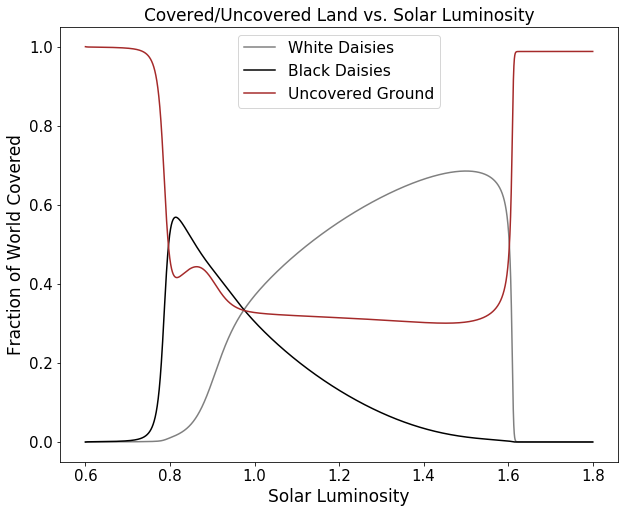

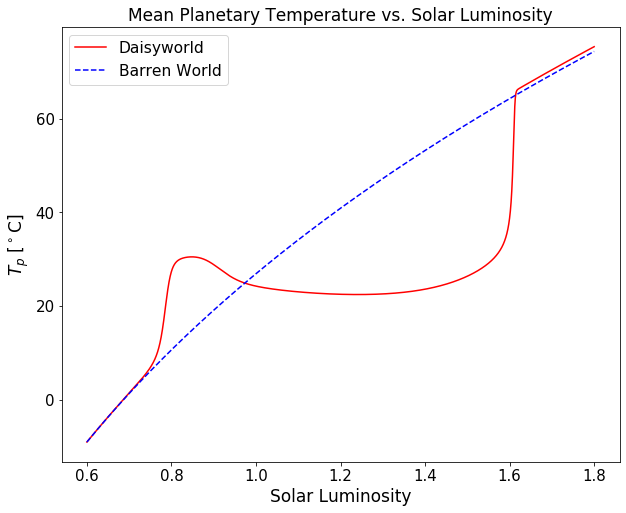

In [59]:
plt.figure(figsize = (10,8)) 
plt.plot(L(time), alpha_w, 'gray', label = 'White Daisies')
plt.plot(L(time), alpha_b, 'black', label = 'Black Daisies') 
plt.plot(L(time), alpha_g, 'brown', label = 'Uncovered Ground') 
plt.title('Covered/Uncovered Land vs. Solar Luminosity', fontsize = 17) 
plt.xlabel('Solar Luminosity', fontsize = 17) 
plt.ylabel('Fraction of World Covered', fontsize = 17) 
plt.legend(fontsize = 15.5)

plt.figure(figsize = (10,8)) 
plt.plot(L(time)[0:-1], temp_p[0:-1], 'red', label = 'Daisyworld') 
plt.plot(L(time)[0:-1], temp_b[0:-1], 'b--', label = 'Barren World') 
plt.title('Mean Planetary Temperature vs. Solar Luminosity', fontsize = 17) 
plt.xlabel('Solar Luminosity', fontsize = 17) 
plt.ylabel('$T_p$ [$^\circ$C]', fontsize = 17) 
plt.legend(fontsize = 15.5) 

In [60]:
############################## Defining functions for Daisyworld with plagues

def plague(t): 
    return gamma + 0.6*abs(np.sin(np.pi*t/100))

def alphawdot_plague(t, alpha_w, alpha_b, alpha_g): 
    return alpha_w*(alpha_g*beta_w(t, alpha_w, alpha_b, alpha_g) - plague(t)) + 0.001
  
def alphabdot_plague(t, alpha_w, alpha_b, alpha_g): 
    return alpha_b*(alpha_g*beta_b(t, alpha_w, alpha_b, alpha_g) - plague(t)) + 0.001

def alphagdot_plague(t, alpha_w, alpha_b, alpha_g): 
    return - alphawdot_plague(t, alpha_w, alpha_b, alpha_g) - alphabdot_plague(t, alpha_w, alpha_b, alpha_g)

In [61]:
def Daisyworld_Plague(dt, time_array, g0, w0, b0):

    alpha_g = np.zeros(len(time_array)) 
    alpha_w = np.zeros(len(time_array)) 
    alpha_b = np.zeros(len(time_array)) 
    temp_p = np.zeros(len(time_array)) 
    temp_b = np.zeros(len(time_array))
  
    alpha_g[0] = g0
    alpha_w[0] = w0 
    alpha_b[0] = b0
  
    for i in range(0, len(time_array)-1):
        
        ## Runge-Kutta scheme
    
        k_1 = dt*alphawdot_plague(time_array[i], alpha_w[i], alpha_b[i], alpha_g[i]) 
        k_2 = dt*alphabdot_plague(time_array[i], alpha_w[i], alpha_b[i], alpha_g[i]) 
        k_3 = dt*alphagdot_plague(time_array[i], alpha_w[i], alpha_b[i], alpha_g[i])
        
        k_4 = dt*alphawdot_plague(time_array[i], alpha_w[i] + (k_1/2), alpha_b[i], alpha_g[i]) 
        k_5 = dt*alphabdot_plague(time_array[i], alpha_w[i], alpha_b[i] + (k_2/2), alpha_g[i]) 
        k_6 = dt*alphagdot_plague(time_array[i], alpha_w[i], alpha_b[i], alpha_g[i] + (k_3/2))
        
        k_7 = dt*alphawdot_plague(time_array[i], alpha_w[i] + (k_4/2), alpha_b[i], alpha_g[i]) 
        k_8 = dt*alphabdot_plague(time_array[i], alpha_w[i], alpha_b[i] + (k_5/2), alpha_g[i])
        k_9 = dt*alphagdot_plague(time_array[i], alpha_w[i], alpha_b[i], alpha_g[i] + (k_6/2))
        
        k_10 = dt*alphawdot_plague(time_array[i], alpha_w[i] + k_7, alpha_b[i], alpha_g[i]) 
        k_11 = dt*alphabdot_plague(time_array[i], alpha_w[i], alpha_b[i] + k_8, alpha_g[i]) 
        k_12 = dt*alphagdot_plague(time_array[i], alpha_w[i], alpha_b[i], alpha_g[i] + k_9)
        
        alpha_w[i+1] = alpha_w[i] + (k_1 + 2*k_4 + 2*k_7 + k_10)/6
        alpha_b[i+1] = alpha_b[i] + (k_2 + 2*k_5 + 2*k_8 + k_11)/6
        alpha_g[i+1] = alpha_g[i] + (k_3 + 2*k_6 + 2*k_9 + k_12)/6
    
        temp_p[i] = ((S*L(time_array[i]) *(1-albedo_p(time_array[i], alpha_w[i], alpha_b[i], alpha_g[i])))/(sigma))**(0.25) - 273
    
        temp_b[i] = ((S*L(time_array[i])*(1-0.5))/(sigma))**(0.25) - 273
    
    return alpha_w, alpha_b, alpha_g, temp_p, temp_b

alpha_w, alpha_b, alpha_g, temp_p, temp_b = Daisyworld_Plague(dt, time, init_g, init_w, init_b)

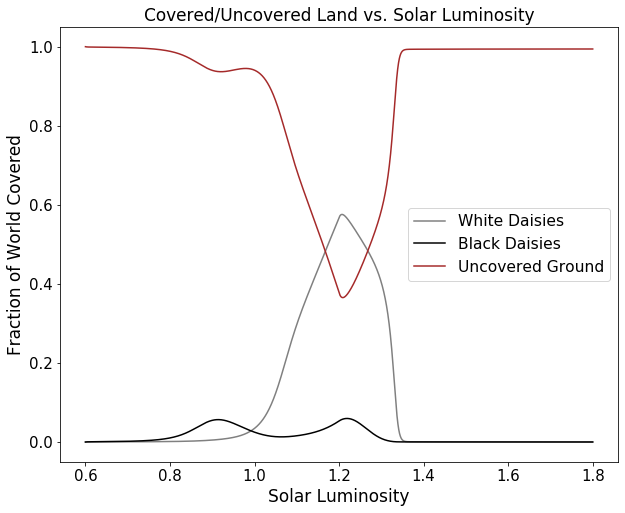

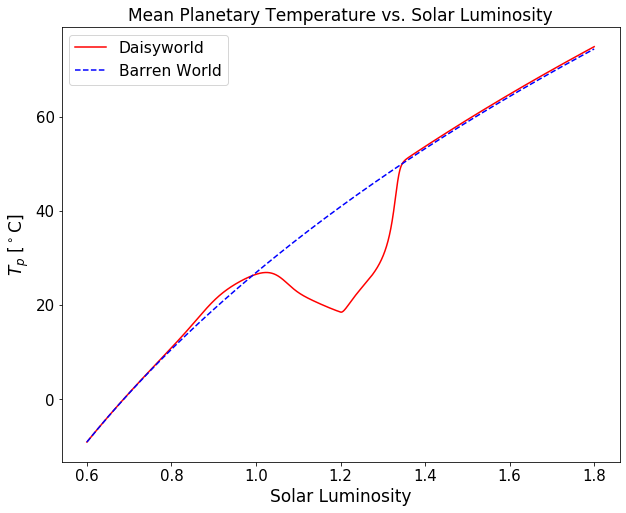

In [62]:
############################## plots for plagued Daisyworld

plt.figure(figsize = (10,8)) 
plt.plot(L(time), alpha_w, 'gray', label = 'White Daisies') 
plt.plot(L(time), alpha_b, 'black', label = 'Black Daisies') 
plt.plot(L(time), alpha_g, 'brown', label = 'Uncovered Ground') 
plt.title('Covered/Uncovered Land vs. Solar Luminosity', fontsize = 17) 
plt.xlabel('Solar Luminosity', fontsize = 17) 
plt.ylabel('Fraction of World Covered', fontsize = 17) 
plt.legend(fontsize = 15.5)

plt.figure(figsize = (10,8)) 
plt.plot(L(time[0:-1]), temp_p[0:-1], 'red', label = 'Daisyworld') 
plt.plot(L(time[0:-1]), temp_b[0:-1], 'b--', label = 'Barren World') 
plt.title('Mean Planetary Temperature vs. Solar Luminosity', fontsize = 17) 
plt.xlabel('Solar Luminosity', fontsize = 17) 
plt.ylabel('$T_p$ [$^\circ$C]', fontsize = 17) 
plt.legend(fontsize = 15.5)  